In [1362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn import svm, grid_search, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score, classification_report

# Cleaning

In [1232]:
data=pd.read_csv('imdb_processed.csv')

In [1233]:
#data.head()

In [1234]:
# change le nom de index
del  data['Unnamed: 0']

In [1235]:
data['year'] = data['year'].astype(int)


In [1236]:
data.describe()

,year,rating,vote,runtime
count,8451.000000,8135.000000,8.135000e+03,6798.000000
mean,1991.626080,6.680000,1.873295e+04,99.984113
std,15.129001,1.281778,8.957999e+04,65.277725
min,1905.000000,1.500000,5.000000e+00,2.000000
25%,1987.000000,6.000000,3.075000e+02,82.000000
50%,1998.000000,6.900000,1.531000e+03,95.000000
75%,2002.000000,7.600000,6.897500e+03,110.000000
max,2005.000000,9.600000,2.462087e+06,1620.000000


In [1237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     8451 non-null   object 
 1   year      8451 non-null   int64  
 2   kind      8451 non-null   object 
 3   genre     8384 non-null   object 
 4   rating    8135 non-null   float64
 5   vote      8135 non-null   float64
 6   country   8152 non-null   object 
 7   language  8052 non-null   object 
 8   cast      8280 non-null   object 
 9   director  7140 non-null   object 
 10  composer  5722 non-null   object 
 11  writer    7204 non-null   object 
 12  runtime   6798 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 858.4+ KB


In [1238]:
# we will change the type of data for :
# year 

In [1239]:
data.isna().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [1240]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

genre null rate: 0.79%
rating null rate: 3.74%
vote null rate: 3.74%
country null rate: 3.54%
language null rate: 4.72%
cast null rate: 2.02%
director null rate: 15.51%
composer null rate: 32.29%
writer null rate: 14.76%
runtime null rate: 19.56%


In [1241]:
data.shape

(8451, 13)

In [1242]:
1653/8451


0.19559815406460773

In [1243]:
#data['director'].replace(np.nan, 'No Data',inplace  = True)

In [1244]:
#plt.figure(figsize=(11,9))
#sns.heatmap(data.corr(),square=True,annot=True,cmap='twilight_shifted')

In [1245]:
#data['genre'].unique()

In [1246]:
#data genre splitting
data['genre'] = data['genre'].str.strip('[]')
genre = data.genre.str.split(',').apply(pd.Series)
genre = genre.drop(columns= [3,4,5,6,7,8,9,10])
genre=genre.rename(columns={0: "genre1", 1: "genre2"})

In [1247]:
data = data.join(genre)
data = data.drop(columns='genre')

In [1248]:
#country
data['country'] = data['country'].str.strip('[]')
country = data.country.str.split(',').apply(pd.Series)
country = country.drop(columns= [2,3,4,5,6,7,8,9,10])
country=country.rename(columns={0: "country1", 1: "country2"})

In [1249]:
data = data.join(country)
data = data.drop(columns='country')

In [1250]:
#language
data['language'] = data['language'].str.strip('[]')
language = data.language.str.split(',').apply(pd.Series)
language = language.drop(columns= [2,3,4,5,6,7,8,9,10])
language=language.rename(columns={0: "language1", 1: "language2"})

In [1251]:
data = data.join(language)
data = data.drop(columns='language')

In [1252]:
#cast
data['cast'] = data['cast'].str.strip('[]')
cast = data.cast.str.split(',').apply(pd.Series)
cast= cast[[0,1]]
cast=cast.rename(columns={0: "cast1", 1: "cast2"})


In [1253]:
data = data.join(cast)
data = data.drop(columns='cast')

In [1254]:
#director
data['director'] = data['director'].str.strip('[]')
director = data.director.str.split(',').apply(pd.Series)
director = director.drop(columns= [2])
director=director.rename(columns={0: "director1", 1: "director2"})

In [1255]:
data = data.join(director)
data = data.drop(columns='director')

In [1256]:
#writer
data['writer'] = data['writer'].str.strip('[]')
writer = data.writer.str.split(',').apply(pd.Series)
writer = writer.drop(columns= [2])
writer=writer.rename(columns={0: "writer1", 1: "writer2"})

In [1257]:
data = data.join(writer)
data = data.drop(columns='writer')

In [1258]:
data=data.rename(columns={2: "genre3"})

In [1259]:
#composer
data['composer'] = data['composer'].str.strip('[]')
composer = data.composer.str.split(',').apply(pd.Series)
composer = composer.drop(columns= [2,3,4,5,6,7,8,9])
composer=composer.rename(columns={0: "composer1", 1: "composer2"})

In [1260]:
data = data.join(composer)
data = data.drop(columns='composer')

In [1261]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1         67
genre2       1952
genre3       4594
country1      299
country2     6811
language1     399
language2    6731
cast1         171
cast2         487
director1    1311
director2    7692
writer1      1247
writer2      3338
composer1    2729
composer2    7433
dtype: int64

In [1262]:
#after checking the results we consider to delete 
#language2     6731
#director2     7692
#country2       6811
#composer2      7433
#genre3          4594
#writer2       3338
#composer1     2729

data = data.drop(columns=['genre2','composer2','language2','director2','country2','composer1','composer2','genre3','writer2','cast2'])


In [1263]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1         67
country1      299
language1     399
cast1         171
director1    1311
writer1      1247
dtype: int64

In [1264]:
data['director1']=np.where(data['director1'].isna()==True,'None',data['director1'])

In [1265]:
data['writer1']=np.where(data['writer1'].isna()==True,'None',data['writer1'])

In [1266]:
data['genre1']=np.where(data['genre1'].isna()==True,'None',data['genre1'])

In [1267]:
data['country1']=np.where(data['country1'].isna()==True,'None',data['country1'])

In [1268]:
data['language1']=np.where(data['language1'].isna()==True,'None',data['language1'])

In [1269]:
data['cast1']=np.where(data['cast1'].isna()==True,'None',data['cast1'])

In [1270]:
data['cast1']=np.where(data['cast1'].isna()==True,'None',data['cast1'])

In [1271]:
data

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,director1,writer1
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50.0,'Documentary','United States','English','Christian Slater',None,'Mike Carrol'
1,Get Up and Dance!,1994,video movie,8.1,18.0,83.0,'Family','United States','English','Paula Abdul','Steve Purcell',None
2,8 Man,1992,movie,5.5,93.0,NaN,'Action','Japan','Japanese','Kai Shishido','Yasuhiro Horiuchi','Kazumasa Hirai'
3,What the #$*! Do We (K)now!?,2004,movie,5.3,13432.0,60.0,'Documentary','United States','English','Marlee Matlin','William Arntz','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4.5,2177.0,96.0,'Comedy','United States','English','Brick Bronsky','Eric Louzil','Lloyd Kaufman'
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,3.9,4384.0,NaN,'Adventure','Japan','Japanese','Tomonori Yazaki','Ishirô Honda',"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6.4,44.0,NaN,'Documentary',None,'English','Rena Baskin','Adriana Bosch','Adriana Bosch'
8448,Epoch,2001,tv movie,4.9,2376.0,NaN,'Sci-Fi','United States','English','David Keith','Matt Codd','Jonathan Raymond'
8449,The Company,2003,movie,6.3,6501.0,NaN,'Drama','United States','English','Neve Campbell','Robert Altman','Neve Campbell'


In [1272]:
data

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,director1,writer1
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50.0,'Documentary','United States','English','Christian Slater',None,'Mike Carrol'
1,Get Up and Dance!,1994,video movie,8.1,18.0,83.0,'Family','United States','English','Paula Abdul','Steve Purcell',None
2,8 Man,1992,movie,5.5,93.0,NaN,'Action','Japan','Japanese','Kai Shishido','Yasuhiro Horiuchi','Kazumasa Hirai'
3,What the #$*! Do We (K)now!?,2004,movie,5.3,13432.0,60.0,'Documentary','United States','English','Marlee Matlin','William Arntz','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4.5,2177.0,96.0,'Comedy','United States','English','Brick Bronsky','Eric Louzil','Lloyd Kaufman'
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,3.9,4384.0,NaN,'Adventure','Japan','Japanese','Tomonori Yazaki','Ishirô Honda',"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6.4,44.0,NaN,'Documentary',None,'English','Rena Baskin','Adriana Bosch','Adriana Bosch'
8448,Epoch,2001,tv movie,4.9,2376.0,NaN,'Sci-Fi','United States','English','David Keith','Matt Codd','Jonathan Raymond'
8449,The Company,2003,movie,6.3,6501.0,NaN,'Drama','United States','English','Neve Campbell','Robert Altman','Neve Campbell'


In [1273]:
data['genre1'] = data['genre1'].str.strip("''").astype(object)
data['country1'] = data['country1'].str.strip("''").astype(object)
data['language1'] = data['language1'].str.strip("''").astype(object)
data['cast1'] = data['cast1'].str.strip("''").astype(object)
data['writer1'] = data['writer1'].str.strip("''").astype(object)
data['director1'] = data['director1'].str.strip("''").astype(object)


In [1274]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1          0
country1        0
language1       0
cast1           0
director1       0
writer1         0
dtype: int64

In [1275]:
# calculate medians for each moovie kind
median_values = data[['runtime','kind']].groupby(['kind']).agg("mean")
median_values

,runtime
kind,
episode,98.230947
movie,99.231426
tv mini series,99.367150
tv movie,103.788491
tv series,102.680154
tv short,70.875000
video game,108.894737
video movie,99.995479


In [1276]:
# impute missing values for rating, vote, runtime columns with medians
kinds = ['episode', 'movie', 'tv mini series', 'tv movie', 'tv series', 'tv short', 'video game', 'video movie']
col_impute = ['runtime']
for kind in kinds:
    for col in col_impute:
        for i in range(len(data)):
            if math.isnan(data[col][i])==True:
                if data['kind'][i] == kind:
                    data[col][i]= median_values.at[kind, col]

<ipython-input-1276-9072499d0d53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]= median_values.at[kind, col]


In [1277]:
data.isna().sum()

title          0
year           0
kind           0
rating       316
vote         316
runtime        0
genre1         0
country1       0
language1      0
cast1          0
director1      0
writer1        0
dtype: int64

In [1278]:
data = data.dropna(subset=['rating'])

In [1279]:
data

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,director1,writer1
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50.000000,Documentary,United States,English,Christian Slater,None,Mike Carrol
1,Get Up and Dance!,1994,video movie,8.1,18.0,83.000000,Family,United States,English,Paula Abdul,Steve Purcell,None
2,8 Man,1992,movie,5.5,93.0,99.231426,Action,Japan,Japanese,Kai Shishido,Yasuhiro Horiuchi,Kazumasa Hirai
3,What the #$*! Do We (K)now!?,2004,movie,5.3,13432.0,60.000000,Documentary,United States,English,Marlee Matlin,William Arntz,William Arntz
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4.5,2177.0,96.000000,Comedy,United States,English,Brick Bronsky,Eric Louzil,Lloyd Kaufman
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,3.9,4384.0,99.231426,Adventure,Japan,Japanese,Tomonori Yazaki,Ishirô Honda,"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6.4,44.0,98.230947,Documentary,None,English,Rena Baskin,Adriana Bosch,Adriana Bosch
8448,Epoch,2001,tv movie,4.9,2376.0,103.788491,Sci-Fi,United States,English,David Keith,Matt Codd,Jonathan Raymond
8449,The Company,2003,movie,6.3,6501.0,99.231426,Drama,United States,English,Neve Campbell,Robert Altman,Neve Campbell


In [1280]:
data=data.rename(columns={'genre1': "Genre", 'country1': "Country",'language1': "Language",'cast1': "Cast",'director1':"Director",'writer1':"Writer",'composer1':"Composer"})


In [1281]:
data['rating']=round(data['rating']).astype(int)


In [1282]:
data['Director'].value_counts().index



Index(['None', 'Kevin Dunn', 'Akira Kurosawa', 'Jim Wynorski',
       'Beth McCarthy-Miller', 'David Mallet', 'Alfred Hitchcock', 'Jing Wong',
       'Tom Clegg', 'Federico Fellini',
       ...
       'Toshinori Fukushima', 'Dirk B.G. Driksen', 'Brad Fraser', 'Paul Feig',
       'Zoran Bihac', 'Akira Nishimori', 'Joseph Green', 'Jean Stewart',
       'Kat Slater', 'Larry Leichliter'],
      dtype='object', length=4131)

In [1288]:
data

,title,year,kind,rating,vote,runtime,Genre,Country,Language,Cast,Director,Writer
0,Dinosaur Planet,2003,tv mini series,8,474.0,50.000000,Documentary,United States,English,Christian Slater,None,Mike Carrol
1,Get Up and Dance!,1994,video movie,8,18.0,83.000000,Family,United States,English,Paula Abdul,Steve Purcell,None
2,8 Man,1992,movie,6,93.0,99.231426,Action,Japan,Japanese,Kai Shishido,Yasuhiro Horiuchi,Kazumasa Hirai
3,What the #$*! Do We (K)now!?,2004,movie,5,13432.0,60.000000,Documentary,United States,English,Marlee Matlin,William Arntz,William Arntz
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4,2177.0,96.000000,Comedy,United States,English,Brick Bronsky,Eric Louzil,Lloyd Kaufman
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,4,4384.0,99.231426,Adventure,Japan,Japanese,Tomonori Yazaki,Ishirô Honda,"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6,44.0,98.230947,Documentary,None,English,Rena Baskin,Adriana Bosch,Adriana Bosch
8448,Epoch,2001,tv movie,5,2376.0,103.788491,Sci-Fi,United States,English,David Keith,Matt Codd,Jonathan Raymond
8449,The Company,2003,movie,6,6501.0,99.231426,Drama,United States,English,Neve Campbell,Robert Altman,Neve Campbell


In [1284]:
data.to_excel("data_sortie.xlsx")

In [1306]:
datafilm=pd.crosstab(data.Genre, data.year, values=data.Genre, aggfunc='count')
datafilm

year,1914,1916,1918,1919,1922,1923,1924,1925,1926,1927,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,44.0,40.0,44.0,55.0,58.0,65.0,65.0,65.0,60.0,33.0
Adventure,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,...,13.0,9.0,12.0,19.0,10.0,13.0,8.0,17.0,11.0,8.0
Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,34.0,38.0,54.0,45.0,55.0,72.0,67.0,80.0,68.0,44.0
Biography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,3.0,9.0,3.0,17.0,22.0,18.0,19.0,15.0,14.0,2.0
Comedy,NaN,NaN,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,...,65.0,59.0,68.0,83.0,82.0,111.0,95.0,96.0,90.0,33.0
Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,22.0,19.0,27.0,24.0,36.0,32.0,43.0,31.0,21.0,13.0
Documentary,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,...,39.0,63.0,61.0,87.0,89.0,113.0,138.0,149.0,177.0,69.0
Drama,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,2.0,...,45.0,53.0,61.0,74.0,108.0,113.0,99.0,90.0,86.0,23.0
Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,6.0,7.0,7.0,8.0,6.0,9.0,7.0,3.0


In [ ]:
years = data['year'].unique()
df2 = pd.DataFrame(columns=['Genre1', 'kind'])
for i in years:
    a =year[year['year']==i]
    a = a[a['kind']==a.kind.max()]
    df2 = df2.append(a)
df2['year'] = df2['year'].astype(int)
df2.sort_values(by='year', inplace=True)
g=sns.catplot(x='year', y='kind', hue="genre1", data=df2, s=20)
plt.xticks(rotation=90)
plt.title('Most popular genre per year',{'fontsize': 20})
g.fig.set_size_inches(23,15)

In [1336]:
year=pd.DataFrame(columns=['year'])
year['year']=data['year']
year['Genre']=data['Genre']
year

,year,Genre
0,2003,Documentary
1,1994,Family
2,1992,Action
3,2004,Documentary
4,1991,Comedy
...,...,...
8446,1969,Adventure
8447,2005,Documentary
8448,2001,Sci-Fi
8449,2003,Drama


In [1340]:
years = year['year'].unique()
df2 = pd.DataFrame()
for i in years:
    a =year[year['year']==i]
    a = a[a['Genre']==a.Genre.max()]
    df2['Genre'] = df2.append(a)
df2['year'] = df2['year'].astype(int)
df2.sort_values(by='year', inplace=True)
df2

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [1344]:
most_genress = pd.DataFrame()
df1 = data[['year', 'title', 'Genre']]
# groupby table
group_tab = df1.groupby(['year', 'Genre'], as_index=False)[['Genre','title']].agg({'title':'count'})
# new df with max count by genre and countries
years = group_tab['year'].unique()
for year in years:
    d = group_tab[(group_tab['year'] == year)]
    d = d[(d['title'] == d['title'].max())]
    most_genress = pd.concat([most_genress, d], ignore_index=True)
most_genress

,year,Genre,title
0,1914,Action,1
1,1916,Drama,1
2,1918,Comedy,3
3,1919,Drama,1
4,1922,Documentary,2
...,...,...,...
108,2001,Drama,113
109,2002,Documentary,138
110,2003,Documentary,149
111,2004,Documentary,177


In [1341]:

most_genres = pd.DataFrame()
df1 = data[['Country', 'title', 'Genre']]
# groupby table
group_tab = df1.groupby(['Country', 'Genre'], as_index=False)[['Genre','title']].agg({'title':'count'})
# new df with max count by genre and countries
countries = group_tab['Country'].unique()
for country in countries:
    d = group_tab[(group_tab['Country'] == country)]
    d = d[(d['title'] == d['title'].max())]
    most_genres = pd.concat([most_genres, d], ignore_index=True)
most_genres

,Country,Genre,title
0,Afghanistan,Drama,1
1,Argentina,Drama,6
2,Armenia,Comedy,1
3,Aruba,Action,1
4,Australia,Comedy,31
...,...,...,...
74,Vietnam,Drama,2
75,West Germany,Drama,23
76,Yugoslavia,Biography,1
77,Yugoslavia,Comedy,1


# GaussianNB

## encoding

In [1350]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Object_list = data.select_dtypes(include = "object").columns
for col in ['title','Genre','kind','Country','Language','Cast','Director','Writer']:
    data[col] = le.fit_transform(data[col].astype(str))

In [1351]:
data

,title,year,kind,rating,vote,runtime,Genre,Country,Language,Cast,Director,Writer,scoring
0,1773,2003,2,8,474.0,50.000000,6,63,16,867,2862,3319,1
1,2424,1994,7,8,18.0,83.000000,8,63,16,3628,3673,3507,1
2,85,1992,1,6,93.0,99.231426,0,37,33,2513,4078,2610,1
3,7538,2004,1,5,13432.0,60.000000,6,63,16,3047,4023,4893,0
4,1349,1991,1,4,2177.0,96.000000,4,63,16,639,1124,2893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,364,1969,1,4,4384.0,99.231426,1,37,33,4644,1565,34,0
8447,2176,2005,0,6,44.0,98.230947,6,43,16,3823,56,71,1
8448,2044,2001,3,5,2376.0,103.788491,20,63,16,1133,2570,2426,0
8449,5971,2003,1,6,6501.0,99.231426,7,63,16,3420,3279,3461,1


In [1230]:
datafilm=data[['title','year']].groupby('year',as_index=False).agg('count')  
datafilm


,year,title
0,1914,1
1,1916,1
2,1918,3
3,1919,1
4,1922,2
...,...,...
83,2001,602
84,2002,616
85,2003,655
86,2004,611


## Feature Selection

In [1163]:
x = data.drop(['rating','title','Writer'], axis = 1)
y = data['rating']


In [1164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [1165]:
y_train.value_counts()

7     2033
8     1652
6     1533
5      579
4      329
9      236
3      108
2       37
10       1
Name: rating, dtype: int64

In [1166]:
percen=((y_train.value_counts().index*y_train.value_counts())/43388)*100

In [1167]:
percen.values

array([3.27993915e+01, 3.04600350e+01, 2.11994100e+01, 6.67235180e+00,
       3.03309671e+00, 4.89536277e+00, 7.46750254e-01, 1.70554070e-01,
       2.30478473e-02])

In [1168]:
# Features selection
y_test

595     7
3854    7
7610    6
8046    9
2791    7
       ..
1786    5
838     8
4387    7
7044    6
522     7
Name: rating, Length: 1627, dtype: int64

In [1169]:
SFM = SelectFromModel(estimator=RandomForestClassifier()).fit(x, y)
s=SFM.fit(x_train, y_train)

In [1170]:
n_features = s.transform(x_train).shape[1]
n_features


5

In [1171]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['year', 'vote', 'runtime', 'Cast', 'Director'], dtype='object')

In [1186]:

gnb = GaussianNB(var_smoothing=0.4)
y_pred = gnb.fit(x_train, y_train).predict(x_test)
acc_rfc = gnb.score(x_test, y_test)
print('The accuracy of the method is:', acc_rfc * 100, '%')


The accuracy of the method is: 32.39090350338045 %


In [1187]:
def best_parameters(X_train, X_test, y_train, y_test):
    lista={}
    i=0
    while(i<=100):
        gnb = GaussianNB(var_smoothing=i)
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        #print("Number of mislabeled points out of a total %d points : %d"
        a=X_test.shape[0]
        b=(y_test != y_pred).sum()
        c=b/a
        lista[i]=1-c
        i+=0.1
    return lista


In [1179]:
best_parameters(x_train, x_test, y_train, y_test)

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


{0: 0.0,
 0.1: 0.32206515058389673,
 0.2: 0.32329440688383526,
 0.30000000000000004: 0.3245236631837738,
 0.4: 0.3239090350338045,
 0.5: 0.32206515058389673,
 0.6: 0.322679778733866,
 0.7: 0.32329440688383526,
 0.7999999999999999: 0.3208358942839582,
 0.8999999999999999: 0.32145052243392747,
 0.9999999999999999: 0.32329440688383526,
 1.0999999999999999: 0.32206515058389673,
 1.2: 0.32206515058389673,
 1.3: 0.3208358942839582,
 1.4000000000000001: 0.32145052243392747,
 1.5000000000000002: 0.32145052243392747,
 1.6000000000000003: 0.32145052243392747,
 1.7000000000000004: 0.32206515058389673,
 1.8000000000000005: 0.32206515058389673,
 1.9000000000000006: 0.322679778733866,
 2.0000000000000004: 0.322679778733866,
 2.1000000000000005: 0.32206515058389673,
 2.2000000000000006: 0.32206515058389673,
 2.3000000000000007: 0.32206515058389673,
 2.400000000000001: 0.32145052243392747,
 2.500000000000001: 0.3208358942839582,
 2.600000000000001: 0.3208358942839582,
 2.700000000000001: 0.32083589428

In [1062]:
1-(2801/4068)

0.3114552605703048

In [1158]:
# Hyper peremeter
grid_search = GridSearchCV(GaussianNB(var_smoothing=9),
                           {
                            'priors':([0.323, 0.3046, 0.2119, 0.0667,0.0303, 0.0489, 0.0074, 0.0067,0.0005])
                            },cv=4, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


TypeError: len() of unsized object

In [1054]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [1064]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
grid_search.best_score

In [ ]:
accuracy
recall
precision
ROC_AUC score
plot ROC_AUC curve

# Model Evaluation

In [1189]:
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred

<ipython-input-1189-78482d6c90e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_initial"]=y_test
<ipython-input-1189-78482d6c90e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_pred"]=y_pred


In [1190]:
from sklearn import metrics
metrics.confusion_matrix(x_test["y_initial"],x_test["y_pred"])

array([[  0,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0,   0,   0,   0,  25,   0,   0],
       [  0,   0,   0,   0,   0,  68,   0,   0],
       [  0,   0,   0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,   0, 385,   3,   0],
       [  0,   0,   0,   0,   0, 499,  13,   2],
       [  0,   0,   0,   0,   0, 409,  24,   8],
       [  0,   0,   0,   0,   0,  53,   0,   4]])

In [1191]:
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

y_pred,7,8,9
y_initial,,,
2,8,0,0
3,25,0,0
4,68,0,0
5,126,0,0
6,385,3,0
7,499,13,2
8,409,24,8
9,53,0,4


In [1192]:
from sklearn import metrics
metrics.confusion_matrix(x_test["y_initial"],x_test["y_pred"])

array([[  0,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0,   0,   0,   0,  25,   0,   0],
       [  0,   0,   0,   0,   0,  68,   0,   0],
       [  0,   0,   0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,   0, 385,   3,   0],
       [  0,   0,   0,   0,   0, 499,  13,   2],
       [  0,   0,   0,   0,   0, 409,  24,   8],
       [  0,   0,   0,   0,   0,  53,   0,   4]])

In [1202]:
print(metrics.accuracy_score(x_test["y_initial"],x_test["y_pred"]))

0.3239090350338045


In [1203]:
print(metrics.precision_score(x_test["y_initial"],x_test["y_pred"],average='weighted'))

0.2728586494245543


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1204]:
print(metrics.recall_score(x_test["y_initial"],x_test["y_pred"],average='weighted'))

0.3239090350338045


In [1205]:
from sklearn.metrics import f1_score
print(metrics.f1_score(x_test["y_initial"],x_test["y_pred"],average='weighted'))

0.18206810930876596


In [1225]:
#ROC_AUC score
from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"],multi_class='ovo',average='weighted',)

AxisError: axis 1 is out of bounds for array of dimension 1

In [1215]:
fpr, tpr, thresholds = metrics.roc_curve(x_test["y_initial"],x_test["y_pred"])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

ValueError: multiclass format is not supported

In [1223]:
prueba=pd.DataFrame()
prueba['proving']=(x_test["y_initial"]==x_test["y_pred"])

In [1224]:
prueba['proving']

595      True
3854     True
7610    False
8046    False
2791     True
        ...  
1786    False
838     False
4387     True
7044    False
522      True
Name: proving, Length: 1627, dtype: bool

# To evaluate AUC

In [1352]:
data2=data

In [1353]:
data2['scoring']= pd.cut(data2.rating, bins=[0,5,10], labels=[0,1]) 

In [1380]:
data2['scoring'].value_counts()

1    6855
0    1280
Name: scoring, dtype: int64

In [1381]:
x = data2.drop(['rating','scoring','title','Writer'], axis = 1)
y = data2['scoring']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [1382]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
acc_rfc = gnb.score(x_test, y_test)
print('The accuracy of the method is:', acc_rfc * 100, '%')

The accuracy of the method is: 49.416103257529194 %


In [1383]:
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred

<ipython-input-1383-78482d6c90e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_initial"]=y_test
<ipython-input-1383-78482d6c90e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_pred"]=y_pred


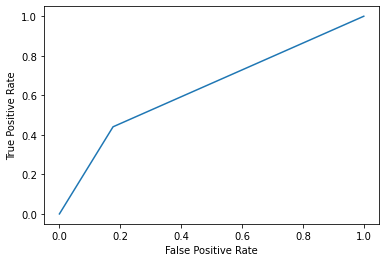

In [1384]:
fpr, tpr, thresholds = metrics.roc_curve(x_test["y_initial"],x_test["y_pred"])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [1388]:
from sklearn.metrics import confusion_matrix
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 


The classification report for GaussianNB is:
              precision    recall  f1-score   support

           0       0.19      0.82      0.31       227
           1       0.94      0.44      0.60      1400

    accuracy                           0.49      1627
   macro avg       0.57      0.63      0.46      1627
weighted avg       0.83      0.49      0.56      1627



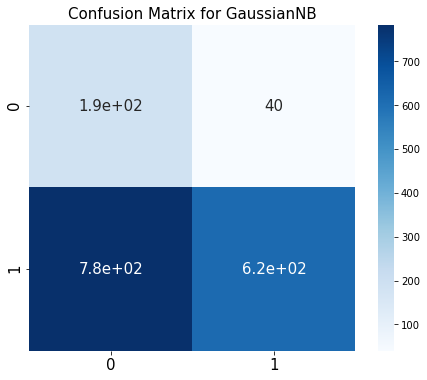

In [1389]:
generate_results(gnb, y_pred, 'GaussianNB')

AUC for our VotingClassifier is: nan


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


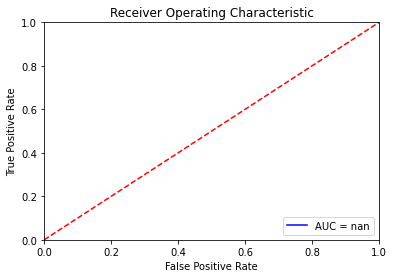

In [1390]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our VotingClassifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1391]:
from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"]))

0.6322514159848962
